# Linear regression in MLX

Markus Enzweiler, markus.enzweiler@hs-esslingen.de

This is a demo used in a Computer Vision & Machine Learning lecture. Feel free to use and contribute.

**Note: This requires a machine with an Apple SoC, e.g. M1/M2/M3 etc.**

See: https://github.com/ml-explore/mlx


## Setup

Adapt `packagePath` to point to the directory containing this notebeook.

In [85]:
# Imports
import sys
import os

In [86]:
# Package Path
package_path = "./" # local
print(f"Package path: {package_path}")

Package path: ./


In [87]:
# Install requirements in the current Jupyter kernel
req_file = os.path.join(package_path, "requirements.txt")
if os.path.exists(req_file):
    !{sys.executable} -m pip install -r {req_file}
else:
    print(f"Requirements file not found: {req_file}")

In [88]:
# Now we should be able to import the additional packages
import mlx 
import mlx.core as mx

import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
mx.random.seed(42)

## MLX

MLX provides composable function transformations, supporting automatic differentiation, automatic vectorization, and optimization of computation graphs. Computation graphs within MLX are dynamically constructed. A key feature of MLX is the use of (and optimization for) unified memory present in the Apple SoCs. 

See:
- https://github.com/ml-explore/mlx
- https://ml-explore.github.io/mlx/build/html/quick_start.html

## Linear regression

### Create some data based on adding noise to a known linear function

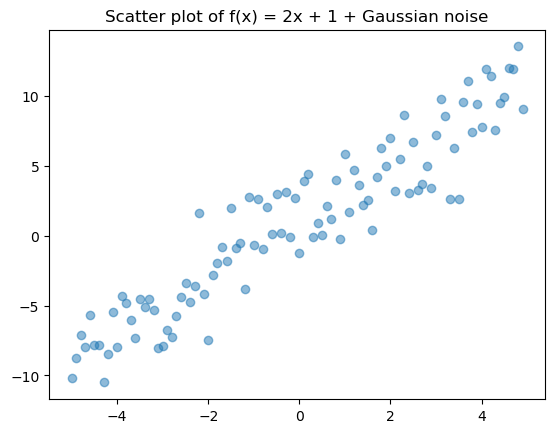

In [89]:
# Creating a function f(x) with a slope of 2 and bias of 1, e.g. f(x) = 2x + 1
# and added Gaussian noise

# True parameters
w_true = 2
b_true = 1
params_true = mx.array([w_true, b_true])

X = mx.arange(-5, 5, 0.1)
Y = w_true*X + b_true + 2 * mx.random.normal(X.shape)

# Visualize
plt.scatter(X, Y, alpha=0.5)
plt.title("Scatter plot of f(x) = 2x + 1 + Gaussian noise")
plt.show()

### Linear model and loss

Our linear regression model is $ y = f(x) = w \cdot x + b$. We solve for $w$ and $b$ using gradient descent. 

In [90]:
def lin_model(params, x):
    w,b = params
    return w*x + b

We uses mean squared error loss between the predictions of our model and true values. 

In [91]:
def loss_fn(params, x, y):
    y_pred = lin_model(params, x)
    return mx.mean(mx.square(y - y_pred))

### Optimization via gradient descent

Initialize parameters $w$ and $b$ randomly.

In [92]:
params = 1e-2 * mx.random.normal((2,))
w,b = params
print(f"Initial weight : {w}")
print(f"Initial bias   : {b}")

Initial weight : array(0.000931404, dtype=float32)
Initial bias   : array(-0.0125854, dtype=float32)


Optimize via gradient descent

In [93]:
# Hyperparameters
num_iters = 10000
learning_rate = 3e-4

# Function that computes loss and its gradient
loss_and_grad_fn = mx.value_and_grad(loss_fn)

# Loop over the number of iterations
for it in range(num_iters):

    # gradient of loss function (vectorized)
    loss, loss_grad = loss_and_grad_fn(params, X, Y)

    # update parameters via gradient descent update rules
    params -= learning_rate * loss_grad

    # Evaluate the parameters explicitly, because MLX uses lazy evaluation
    mx.eval(params)

    # Give some status output once in a while
    if it % 500 == 0 or it == num_iters - 1:
        w,b = params  
        error_norm = mx.sum(mx.square(params - params_true)) ** 0.5
        print(f"Iteration {it:5d} | Loss {loss.item():>10.5f} | " 
              f"w {w.item():> 8.5f} | b {b.item():> 8.5f} | Error norm {error_norm.item():>.5f}")


    
w,b = params    
print(f"Final weight after optimization : {w.item():.5f} (true: {w_true})")
print(f"Final bias after optimization   : {b.item():.5f} (true: {b_true})")       

Iteration     0 | Loss   37.11460 | w  0.01068 | b -0.01201 | Error norm 2.23194
Iteration   500 | Loss    5.18333 | w  1.79279 | b  0.25134 | Error norm 0.77681
Iteration  1000 | Loss    4.69448 | w  1.93931 | b  0.45444 | Error norm 0.54893
Iteration  1500 | Loss    4.53941 | w  1.95218 | b  0.60555 | Error norm 0.39734
Iteration  2000 | Loss    4.45506 | w  1.95390 | b  0.71755 | Error norm 0.28618
Iteration  2500 | Loss    4.40876 | w  1.95455 | b  0.80053 | Error norm 0.20458
Iteration  3000 | Loss    4.38336 | w  1.95497 | b  0.86201 | Error norm 0.14516
Iteration  3500 | Loss    4.36942 | w  1.95528 | b  0.90755 | Error norm 0.10270
Iteration  4000 | Loss    4.36176 | w  1.95551 | b  0.94128 | Error norm 0.07367
Iteration  4500 | Loss    4.35756 | w  1.95568 | b  0.96628 | Error norm 0.05569
Iteration  5000 | Loss    4.35526 | w  1.95580 | b  0.98479 | Error norm 0.04674
Iteration  5500 | Loss    4.35399 | w  1.95590 | b  0.99851 | Error norm 0.04412
Iteration  6000 | Loss    4.

Visualize linear fit

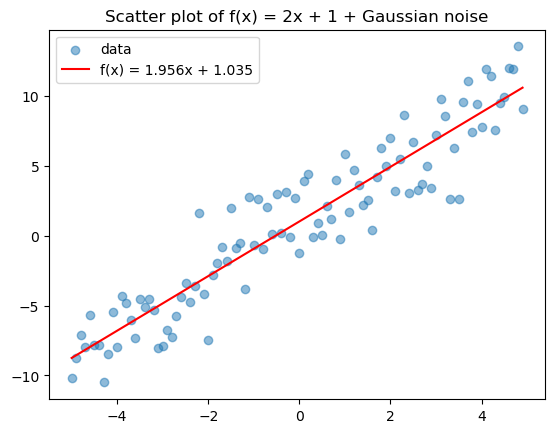

In [94]:
# Visualize
plt.scatter(X, Y, alpha=0.5)
plt.title("Scatter plot of f(x) = 2x + 1 + Gaussian noise")

# Plot the recovered line
Y_model = lin_model(params, X)
plt.plot(X.tolist(), Y_model.tolist(), color='red')

plt.legend(["data", f"f(x) = {w.item():.3f}x + {b.item():.3f}"])
plt.show()